In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('museum_visitors.csv')

In [3]:
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date                                  59 non-null     object
 1   Avila Adobe                           59 non-null     int64 
 2   Firehouse Museum                      59 non-null     int64 
 3   Chinese American Museum               59 non-null     int64 
 4   America Tropical Interpretive Center  59 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ KB


In [5]:
df['Date'] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df = df.set_index('Date')

<AxesSubplot:title={'center':'Museum Visitors'}, xlabel='Date'>

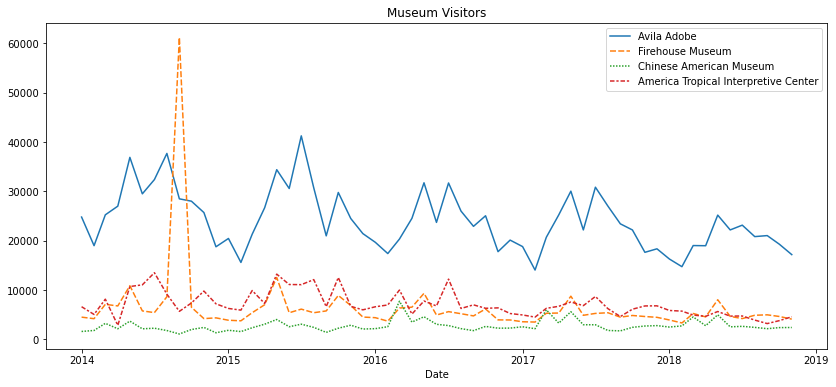

In [6]:
plt.figure(figsize=(14,6))
plt.title("Museum Visitors")
sns.lineplot(data=df)

In [7]:
df = df.reset_index()

In [8]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month_name().str[:3]

In [9]:
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center,Year,Month
0,2014-01-01,24778,4486,1581,6602,2014,Jan
1,2014-02-01,18976,4172,1785,5029,2014,Feb
2,2014-03-01,25231,7082,3229,8129,2014,Mar
3,2014-04-01,26989,6756,2129,2824,2014,Apr
4,2014-05-01,36883,10858,3676,10694,2014,May


In [10]:
df = df.set_index('Month')

<AxesSubplot:title={'center':'All Museum Visitors'}, xlabel='Month', ylabel='Visitors'>

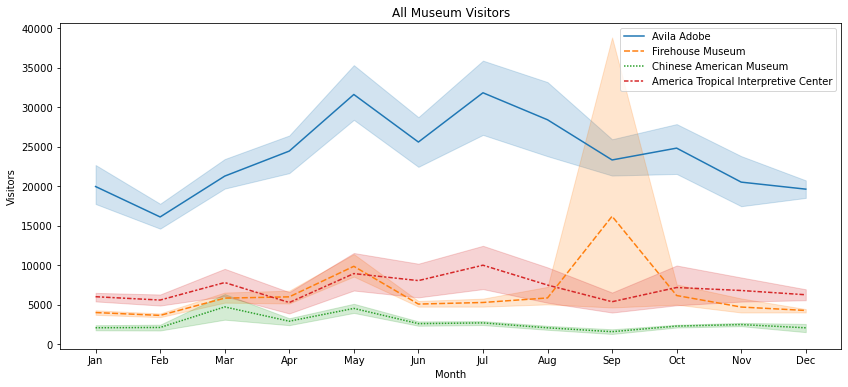

In [11]:
plt.figure(figsize=(14,6))
plt.title("All Museum Visitors")
plt.ylabel("Visitors")
sns.lineplot(data=df.iloc[:,:-1])

#### Only visitors to the Firehouse Museum surged as compared to visitors to the other 3 museums. Check for events held on September 2014 for the Firehouse Museum or cross reference with daily data on Firehouse Museum visitors for discrepancies for the month of September 2014.

#### Assuming the visitor count for the Fire Museum in September is incorrectly recorded:

In [12]:
df = df.reset_index()

In [13]:
df[df['Month'] == 'Sep'] #note visitors for Firehouse Musem for 2014-09-01

,Month,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center,Year
8,Sep,2014-09-01,28473,61192,1073,5661,2014
20,Sep,2015-09-01,20967,5746,1398,6608,2015
32,Sep,2016-09-01,22897,4736,1754,6977,2016
44,Sep,2017-09-01,23403,4484,1704,4607,2017
56,Sep,2018-09-01,21020,4956,2146,3180,2018


In [14]:
fhm2014 = df['Firehouse Museum'][df['Year'] == 2014] #2014's visitors accross all months
fhm2014

0      4486
1      4172
2      7082
3      6756
4     10858
5      5751
6      5406
7      8619
8     61192
9      6488
10     4189
11     4339
Name: Firehouse Museum, dtype: int64

In [15]:
septemberVisitors = int(fhm2014.drop(8).mean()) #drop september visitors number and use the mean of the remaining year's visits for imputation
septemberVisitors

6195

In [16]:
fhm2014[8] = septemberVisitors

In [17]:
fhm2014

0      4486
1      4172
2      7082
3      6756
4     10858
5      5751
6      5406
7      8619
8      6195
9      6488
10     4189
11     4339
Name: Firehouse Museum, dtype: int64

In [18]:
df['Firehouse Museum'][df['Year'] == 2014] = fhm2014

C:\Users\dnkr9\AppData\Local\Temp/ipykernel_20584/3762610956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Firehouse Museum'][df['Year'] == 2014] = fhm2014


In [19]:
df['Firehouse Museum'][df['Date'] == '2014-09-01'] #immuted

8    6195
Name: Firehouse Museum, dtype: int64

In [20]:
df = df.set_index('Month')

<AxesSubplot:title={'center':'Museum Visitors'}, xlabel='Month'>

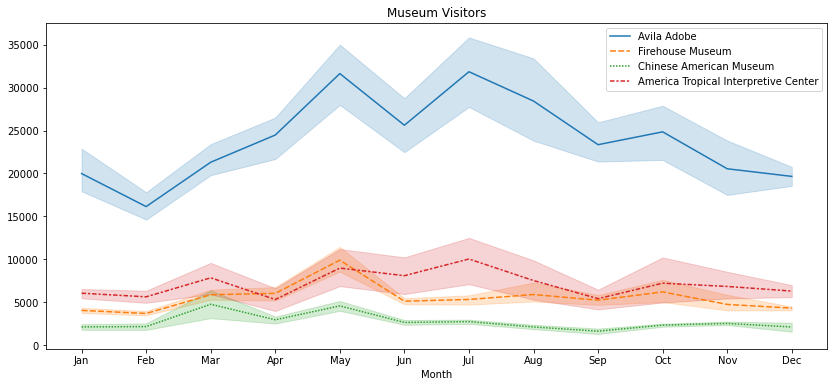

In [21]:
plt.figure(figsize=(14,6))
plt.title("Museum Visitors")
sns.lineplot(data=df.iloc[:,:-1])

### Looks better now. Now lets analyze the visitor count for the 4 individual museums

In [22]:
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center,Year
Month,,,,,,
Jan,2014-01-01,24778,4486,1581,6602,2014
Feb,2014-02-01,18976,4172,1785,5029,2014
Mar,2014-03-01,25231,7082,3229,8129,2014
Apr,2014-04-01,26989,6756,2129,2824,2014
May,2014-05-01,36883,10858,3676,10694,2014


<AxesSubplot:xlabel='America Tropical Interpretive Center', ylabel='Visitors'>

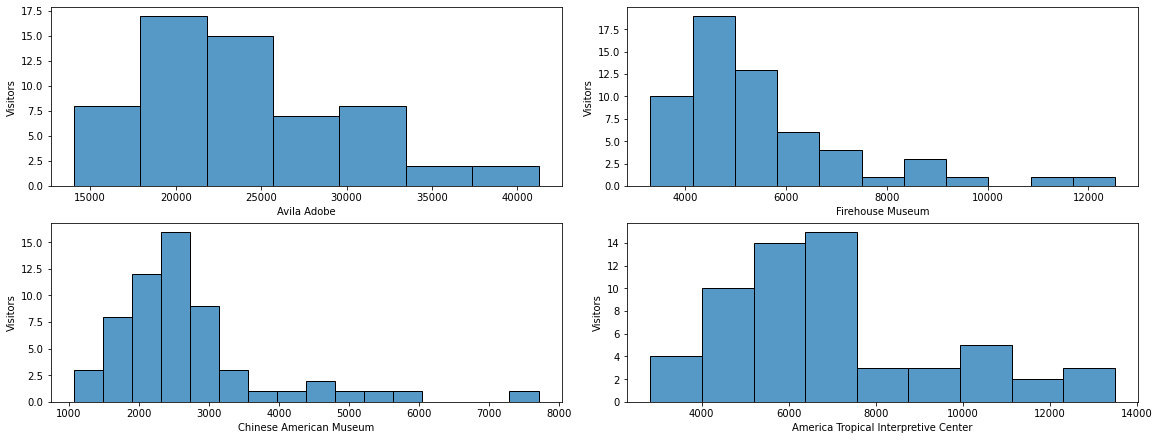

In [23]:
fig, ax = plt.subplots(2,2,figsize=(16,6),constrained_layout=True)
ax[0,0].set_ylabel('Visitors')
ax[0,1].set_ylabel('Visitors')
ax[1,0].set_ylabel('Visitors')
ax[1,1].set_ylabel('Visitors')

sns.histplot(data=df.iloc[:,1], ax=ax[0,0])
sns.histplot(data=df.iloc[:,2], ax=ax[0,1])
sns.histplot(data=df.iloc[:,3], ax=ax[1,0])
sns.histplot(data=df.iloc[:,4], ax=ax[1,1])

<AxesSubplot:title={'center':'America Tropical Interpretive Center'}, xlabel='Month', ylabel='Visitors'>

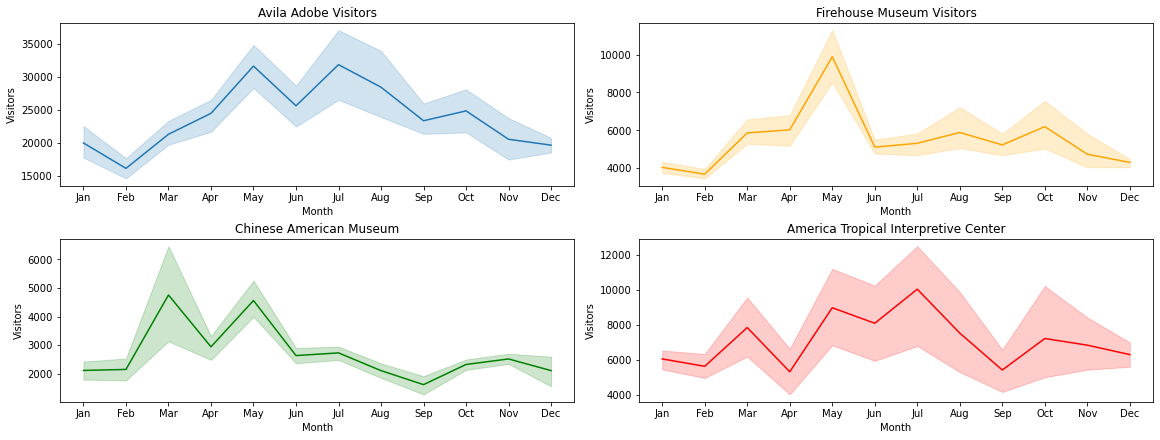

In [24]:
fig, ax = plt.subplots(2,2,figsize=(16,6),constrained_layout=True)
ax[0,0].set_title("Avila Adobe Visitors")
ax[0,1].set_title("Firehouse Museum Visitors")
ax[1,0].set_title("Chinese American Museum")
ax[1,1].set_title("America Tropical Interpretive Center")
ax[0,0].set_ylabel('Visitors')
ax[0,1].set_ylabel('Visitors')
ax[1,0].set_ylabel('Visitors')
ax[1,1].set_ylabel('Visitors')

sns.lineplot(data=df.iloc[:,1], ax=ax[0,0])
sns.lineplot(data=df['Firehouse Museum'],ax=ax[0,1], color='orange')
sns.lineplot(data=df['Chinese American Museum'],ax=ax[1,0], color='green')
sns.lineplot(data=df['America Tropical Interpretive Center'],ax=ax[1,1], color='red')

### The line on each plot is the average visitors by each museum across 2014-2018. The colored area above and below the mean line is the 95% confidence interval where the visitor count will potentially stretch to on either ends

Avila Adobe visitors are on the low side in February and peak in May and July.  
Firehouse Musem visitors are low at the start and ends of the year (Jan-Feb, Nov-Dec), and is highest in May.  
Chinese American Musem visitors are low In September and high in March and May.  
America Tropical Inerpretive Center visitors are low in April & September, and high in May and July.

In [25]:
from scipy import stats

<AxesSubplot:title={'center':'Normalized Avila Adobe Visitors'}, xlabel='Month', ylabel='Avila Adobe'>

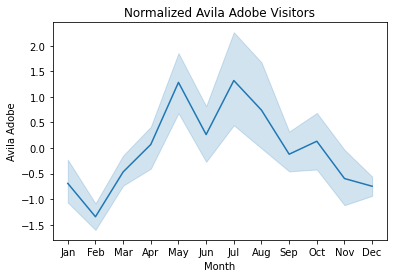

In [26]:
plt.title("Normalized Avila Adobe Visitors")
sns.lineplot(data=stats.zscore(df['Avila Adobe']))

In [27]:
df_norm = df.copy()
df_norm2 = df_norm.copy()

In [28]:
df_norm['Avila Adobe'] = stats.zscore(df['Avila Adobe'])

In [29]:
stats.zscore(df['Avila Adobe']).head()

Month
Jan    0.121447
Feb   -0.862215
Mar    0.198248
Apr    0.496297
May    2.173710
Name: Avila Adobe, dtype: float64

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [31]:
cols = df.columns[1:-1]

In [32]:
scaler = StandardScaler()
X = df_norm.iloc[:,1:-1].values
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=cols)
df_norm = df_norm.reset_index().join(df_scaled, how='outer', rsuffix='_scaled').set_index('Month')

<AxesSubplot:title={'center':'Museum Visitors'}, xlabel='Month'>

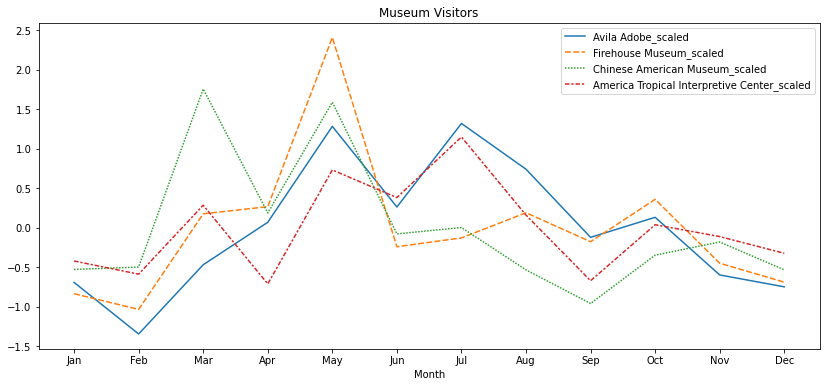

In [38]:
plt.figure(figsize=(14,6))
plt.title("Museum Visitors")

sns.lineplot(data=df_norm.iloc[:,6:], ci=None)

In [34]:
scaler2 = MinMaxScaler()
X_scaled2 = scaler2.fit_transform(X)
df_scaled2 = pd.DataFrame(X_scaled2, columns=cols)
df_norm3 = df_norm2.reset_index().join(df_scaled2, how='outer', rsuffix='_scaled').set_index('Month')

<AxesSubplot:title={'center':'Museum Visitors'}, xlabel='Month'>

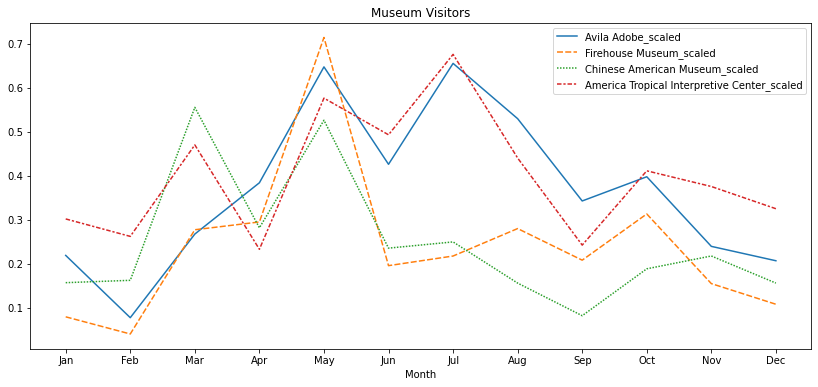

In [35]:
plt.figure(figsize=(14,6))
plt.title("Museum Visitors")

sns.lineplot(data=df_norm3.iloc[:,6:], ci=None)

<AxesSubplot:title={'center':'min max'}, xlabel='Month', ylabel='Visitors'>

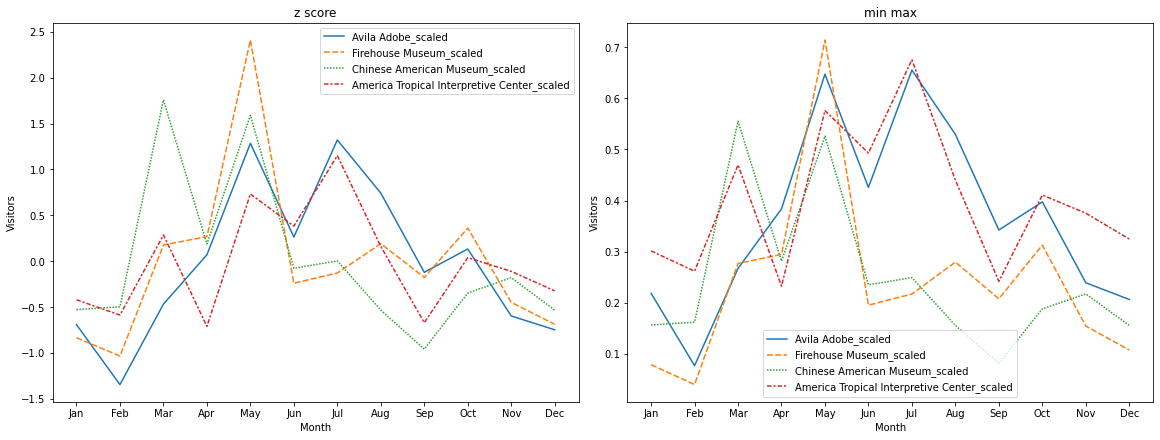

In [36]:
fig, ax = plt.subplots(1,2,figsize=(16,6),constrained_layout=True)
ax[0].set_title("z score")
ax[1].set_title("min max")
#ax[1,0].set_title("Chinese American Museum")
#ax[1,1].set_title("America Tropical Interpretive Center")
ax[0].set_ylabel('Visitors')
ax[1].set_ylabel('Visitors')
#ax[1,0].set_ylabel('Visitors')
#ax[1,1].set_ylabel('Visitors')

sns.lineplot(data=df_norm.iloc[:,6:], ci=None, ax=ax[0])
sns.lineplot(data=df_norm3.iloc[:,6:], ci=None, ax=ax[1])
#sns.lineplot(data=df.iloc[:,1], ax=ax[0,0])
#sns.lineplot(data=df['Firehouse Museum'],ax=ax[0,1], color='red')
#sns.lineplot(data=df['Chinese American Museum'],ax=ax[1,0], color='green')
#sns.lineplot(data=df['America Tropical Interpretive Center'],ax=ax[1,1], color='orange')

### Area to possibly investigate: Incongruency in visitor number dipping and spiking across the different museums  
Why do visitor numbers dip across all other museums apart from the <b>Chinese American Musem</b> in the month of <b>February</b>?  

Why do visitor numbers dip from <b>March to April</b> for the <b>Chinese American Museum and America Tropical Interpretive Center</b> as compared to the other two museums?  

Why do visitor numbers spike harder from <b>June to July</b> for the <b>Avila Adobe Museum and America Tropical Interpretive Center</b> as compared to the other two museums?  

Why do visitor numbers increase from <b>July to August</b> for the <b>Firehouse Museum</b> but decrease for the other museums?  

Why do visitor numbers increase from <b>October to November</b> for the <b>Chinese American Museum</b> but decrease for the other museums?

### Strategies from a business perspective:
Staffing can be adjusted to save manpower cost and potentially utility expenses depending on the time range of visits. (e.g. if no visitors after 4pm on tuesdays, museum can close on tuesdays at 4pm)  

Staffing can also be supplemented during peak visitor periods to better engage them for a better visitor experience / facilitate faster moving traffic so that the museum will be less congested at each exhibit.  

Tour programmes can be arranged during low visitors periods at discounted pricing to boost visitor numbers and charged a peak fee during peak periods to maximize revenues.  

### Improvements to data collection that can potentially help with future data-driven decisions:

Lower level aggregation of data to view number of visits on a daily basis with more details.  

Categorical grouping of visitor types, i.e. tour groups, school excursions, tourists, locals, etc.  

Event-driven visits, i.e cultural holidays, tours, limited time exhibitions, art displays, workshops, talks, etc.